# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#create empty list to store data
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudniess_list = []
wind_speed_list = []
country_list = []
date_list = []

#Setting constant values
units = 'imperial'
base_url = 'https://api.openweathermap.org/data/2.5/weather?'
count = -1

for city in cities:
    count += 1
    target_url = f"{base_url}q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(target_url).json()
    
    try:  
        city_list.append(response['name'])
        lat_list.append(round(response['coord']['lat'],2))
        lng_list.append(round(response['coord']['lon'],2))
        max_temp_list.append(response['main']['temp_max'])
        humidity_list.append(response['main']['humidity'])
        cloudniess_list.append(response['clouds']['all'])
        wind_speed_list.append(response['wind']['speed'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])        
        
    except:
        print('City Not Found')
        
    time.sleep(1)
    
    print(f"Processing Record {count} | {city}")

Processing Record 0 | new norfolk
Processing Record 1 | nago
Processing Record 2 | punta arenas
Processing Record 3 | souillac
Processing Record 4 | puerto ayora
Processing Record 5 | tasiilaq
Processing Record 6 | gimli
Processing Record 7 | coahuayana
City Not Found
Processing Record 8 | tsihombe
Processing Record 9 | tazovskiy
Processing Record 10 | severo-kurilsk
Processing Record 11 | palmer
Processing Record 12 | hithadhoo
Processing Record 13 | ushuaia
Processing Record 14 | kruisfontein
Processing Record 15 | hit
Processing Record 16 | hermanus
Processing Record 17 | cabo san lucas
Processing Record 18 | kozachi laheri
Processing Record 19 | rikitea
Processing Record 20 | jamestown
Processing Record 21 | yellowknife
Processing Record 22 | tocopilla
Processing Record 23 | mataura
Processing Record 24 | pevek
Processing Record 25 | nata
City Not Found
Processing Record 26 | illoqqortoormiut
Processing Record 27 | manokwari
Processing Record 28 | barrow
Processing Record 29 | port

Processing Record 235 | tingo maria
Processing Record 236 | lagoa
Processing Record 237 | burgeo
Processing Record 238 | grindavik
Processing Record 239 | asau
Processing Record 240 | shimsk
Processing Record 241 | nouadhibou
City Not Found
Processing Record 242 | barentsburg
City Not Found
Processing Record 243 | dzhusaly
Processing Record 244 | djambala
Processing Record 245 | barentu
Processing Record 246 | sulangan
Processing Record 247 | saint-augustin
Processing Record 248 | cidreira
Processing Record 249 | mahebourg
City Not Found
Processing Record 250 | marcona
Processing Record 251 | torbay
City Not Found
Processing Record 252 | artyk
City Not Found
Processing Record 253 | rungata
Processing Record 254 | ardakan
Processing Record 255 | gravdal
Processing Record 256 | sur
Processing Record 257 | berlevag
Processing Record 258 | broken hill
Processing Record 259 | pontes e lacerda
Processing Record 260 | fort nelson
Processing Record 261 | pemangkat
Processing Record 262 | portr

Processing Record 469 | kitgum
City Not Found
Processing Record 470 | umm durman
Processing Record 471 | westport
Processing Record 472 | pleasant grove
Processing Record 473 | bac lieu
Processing Record 474 | alcudia
Processing Record 475 | laguna
Processing Record 476 | isabela
Processing Record 477 | urumqi
City Not Found
Processing Record 478 | tumannyy
Processing Record 479 | la ronge
Processing Record 480 | pangnirtung
Processing Record 481 | korla
Processing Record 482 | passo fundo
Processing Record 483 | batagay-alyta
Processing Record 484 | dungarpur
Processing Record 485 | ceuta
Processing Record 486 | cape coast
City Not Found
Processing Record 487 | yanan
Processing Record 488 | chifeng
Processing Record 489 | inirida
Processing Record 490 | penhold
Processing Record 491 | vanavara
Processing Record 492 | komsomolskiy
Processing Record 493 | tateyama
Processing Record 494 | sembe
Processing Record 495 | manggar
Processing Record 496 | talcahuano
Processing Record 497 | kya

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# creating DataFrame 
city_df = pd.DataFrame(columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', \
                                  'Wind Speed', 'Country', 'Date'])

city_df['City'] = city_list
city_df['Lat'] = lat_list
city_df['Lng'] = lng_list
city_df['Max Temp'] = max_temp_list
city_df['Humidity'] = humidity_list
city_df['Cloudiness'] = cloudniess_list
city_df['Wind Speed'] = wind_speed_list
city_df['Country'] = country_list
city_df['Date'] = date_list

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,52.92,72,96,5.99,AU,1658986172
1,Nago,26.59,127.98,87.46,70,75,14.45,JP,1658986173
2,Punta Arenas,-53.15,-70.92,39.31,81,20,13.80,CL,1658986175
3,Souillac,-20.52,57.52,73.78,78,40,11.50,MU,1658986176
4,Puerto Ayora,-0.74,-90.35,67.55,99,98,5.01,EC,1658986178


In [13]:
#Writing it to CSV file
city_df.to_csv(output_data_file)

In [14]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,21.027016,16.501190,70.380693,71.259325,54.136767,7.920586,1.658987e+09
std,32.693942,89.475115,13.485370,20.575360,38.429083,5.668921,2.789888e+02
min,-54.800000,-175.200000,33.820000,1.000000,0.000000,0.000000,1.658986e+09
25%,-3.845000,-60.020000,60.810000,60.000000,18.000000,3.945000,1.658986e+09
50%,23.890000,20.170000,72.230000,75.000000,54.000000,6.820000,1.658987e+09
75%,48.095000,95.500000,80.680000,87.500000,96.000000,10.545000,1.658987e+09
max,78.220000,179.320000,99.050000,100.000000,100.000000,35.010000,1.658987e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
if city_df['Humidity'].max() > 100:
    city_df = city_df[city_df['Humidity'] <= 100]
    city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,21.027016,16.501190,70.380693,71.259325,54.136767,7.920586,1.658987e+09
std,32.693942,89.475115,13.485370,20.575360,38.429083,5.668921,2.789888e+02
min,-54.800000,-175.200000,33.820000,1.000000,0.000000,0.000000,1.658986e+09
25%,-3.845000,-60.020000,60.810000,60.000000,18.000000,3.945000,1.658986e+09
50%,23.890000,20.170000,72.230000,75.000000,54.000000,6.820000,1.658987e+09
75%,48.095000,95.500000,80.680000,87.500000,96.000000,10.545000,1.658987e+09
max,78.220000,179.320000,99.050000,100.000000,100.000000,35.010000,1.658987e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.
city_df.index[city_df['Humidity'] > 100]

Int64Index([], dtype='int64')

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

quartiles = city_df['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Calculate lower and upper boundary
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(upper_bound)
print(lower_bound)

128.75
18.75


In [14]:
clean_city_data = city_df.loc[(city_df['Humidity'] > lower_bound) & (city_df['Humidity'] < upper_bound)]

clean_city_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.00000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,20.91558,16.321739,69.964565,72.461957,55.007246,7.938043,1.658987e+09
std,32.91962,89.868367,13.256378,18.901944,38.194126,5.679800,2.783288e+02
min,-54.80000,-175.200000,33.820000,20.000000,0.000000,0.000000,1.658986e+09
25%,-5.18500,-60.827500,60.757500,61.750000,20.000000,3.995000,1.658986e+09
50%,23.64000,19.635000,72.085000,76.000000,57.000000,6.820000,1.658987e+09
75%,48.49500,96.272500,80.300000,88.000000,96.000000,10.585000,1.658987e+09
max,78.22000,179.320000,99.050000,100.000000,100.000000,35.010000,1.658987e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

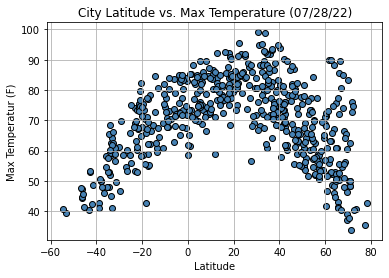

In [90]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], edgecolors='black', c='steelblue')
plt.title(f"City Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperatur (F)')
plt.grid()
plt.savefig('output_data/CityLatitude-vs-MaxTemperature.png')
plt.show()

## Latitude vs. Humidity Plot

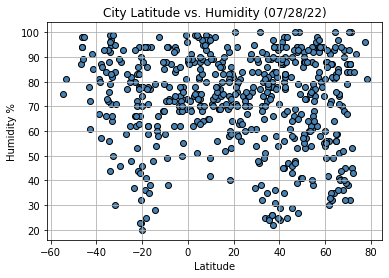

In [91]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], edgecolors='black', c='steelblue')
plt.title(f"City Latitude vs. Humidity ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig('output_data/CityLatitude-vs-Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

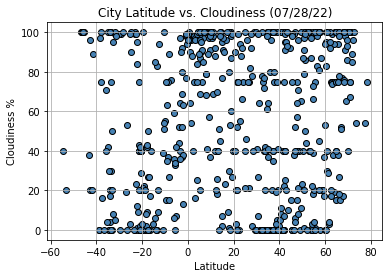

In [92]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], edgecolors='black', c='steelblue')
plt.title(f"City Latitude vs. Cloudiness ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig('output_data/CityLatitude-vs-Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

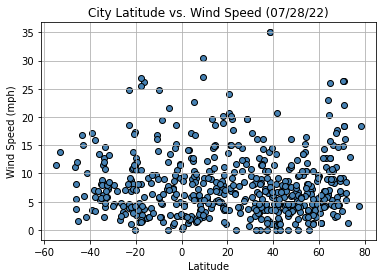

In [93]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], edgecolors='black', c='steelblue')
plt.title(f"City Latitude vs. Wind Speed ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('output_data/CityLatitude-vs-WindSpeed.png')
plt.show()

## Linear Regression

In [94]:
north_Hem_df = clean_city_data[clean_city_data['Lat'] >= 0]
north_Hem_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,3.920000e+02
mean,38.092577,12.875077,72.036071,72.323980,59.252551,7.857372,1.658987e+09
std,20.908542,88.202218,13.267735,19.111856,37.820345,5.737378,2.760947e+02
min,0.150000,-173.300000,33.820000,22.000000,0.000000,0.000000,1.658986e+09
25%,19.247500,-68.067500,62.985000,60.000000,20.000000,4.000000,1.658986e+09
50%,39.295000,18.820000,73.930000,76.000000,75.000000,6.600000,1.658987e+09
75%,55.307500,90.267500,82.127500,88.000000,97.000000,10.360000,1.658987e+09
max,78.220000,179.320000,99.050000,100.000000,100.000000,35.010000,1.658987e+09


In [95]:
south_Hem_df = clean_city_data[clean_city_data['Lat'] < 0]
south_Hem_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,1.600000e+02
mean,-21.168062,24.766063,64.889375,72.800000,44.606250,8.135687,1.658987e+09
std,13.070332,93.571772,11.815119,18.432198,37.209436,5.548974,2.751230e+02
min,-54.800000,-175.200000,39.310000,20.000000,0.000000,0.000000,1.658986e+09
25%,-32.792500,-54.622500,57.260000,62.000000,8.750000,3.962500,1.658986e+09
50%,-20.355000,21.120000,67.060000,77.000000,39.500000,7.125000,1.658987e+09
75%,-10.202500,119.402500,74.085000,87.000000,84.250000,11.447500,1.658987e+09
max,-0.170000,175.520000,84.970000,99.000000,100.000000,26.840000,1.658987e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3527048859067093


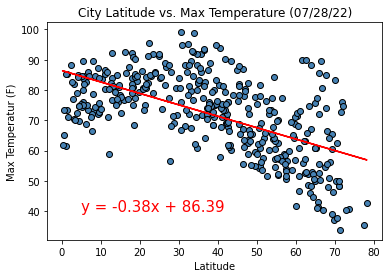

In [96]:
plt.scatter(north_Hem_df['Lat'], north_Hem_df['Max Temp'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(north_Hem_df['Lat'], north_Hem_df['Max Temp'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*north_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (5,40), fontsize=15, color='r')
plt.plot(north_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperatur (F)')

print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5877398255803574


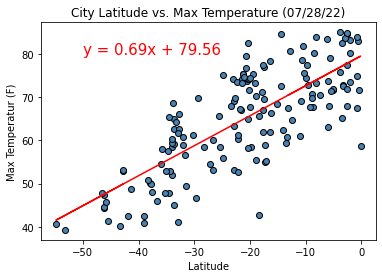

In [97]:
plt.scatter(south_Hem_df['Lat'], south_Hem_df['Max Temp'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(south_Hem_df['Lat'], south_Hem_df['Max Temp'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*south_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (-50,80), fontsize=15, color='r')
plt.plot(south_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperatur (F)')

print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.021148360129566758


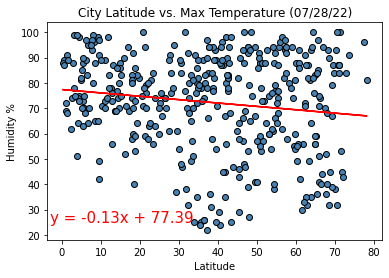

In [98]:
plt.scatter(north_Hem_df['Lat'], north_Hem_df['Humidity'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(north_Hem_df['Lat'], north_Hem_df['Humidity'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*north_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (-3,25), fontsize=15, color='r')
plt.plot(north_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')

print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.016850528557873782


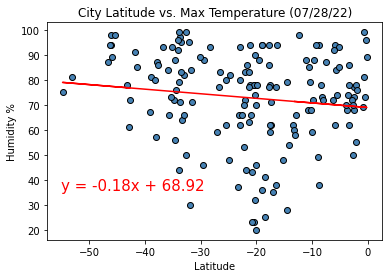

In [99]:
plt.scatter(south_Hem_df['Lat'], south_Hem_df['Humidity'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(south_Hem_df['Lat'], south_Hem_df['Humidity'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*south_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (-55,36), fontsize=15, color='r')
plt.plot(south_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')

print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00677609358615665


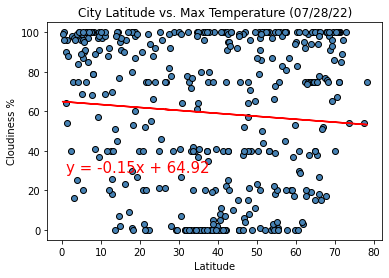

In [100]:
plt.scatter(north_Hem_df['Lat'], north_Hem_df['Cloudiness'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(north_Hem_df['Lat'], north_Hem_df['Cloudiness'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*north_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (1,29), fontsize=15, color='r')
plt.plot(north_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')

print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00046625443066865025


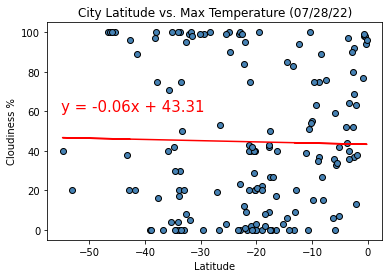

In [101]:
plt.scatter(south_Hem_df['Lat'], south_Hem_df['Cloudiness'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(south_Hem_df['Lat'], south_Hem_df['Cloudiness'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*south_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (-55,60), fontsize=15, color='r')
plt.plot(south_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')

print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00039101221952433403


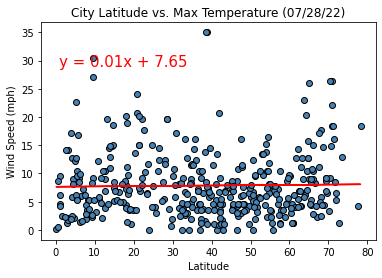

In [102]:
plt.scatter(north_Hem_df['Lat'], north_Hem_df['Wind Speed'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(north_Hem_df['Lat'], north_Hem_df['Wind Speed'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*north_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (1,29), fontsize=15, color='r')
plt.plot(north_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0005888196037942124


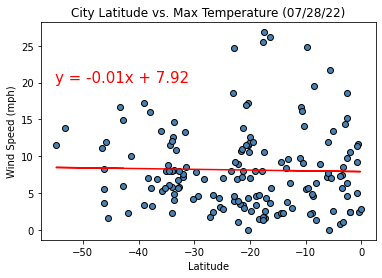

In [103]:
plt.scatter(south_Hem_df['Lat'], south_Hem_df['Wind Speed'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(south_Hem_df['Lat'], south_Hem_df['Wind Speed'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*south_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (-55,20), fontsize=15, color='r')
plt.plot(south_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-value is: {rvalue**2}")


plt.show()